# HW6 Neural Networks
# 박지현, 1903055, 생명과학과

# HW Problem 1: Iris data

We will be using the famous Iris dataset, which contains measurements of the sepal length, sepal width, petal length, and petal width for three species of iris flowers (Iris setosa, Iris versicolor, and Iris virginica). The goal is to predict the species of an iris flower based on these measurements.

In [ ]:
import torch
import numpy as np

import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Convert the data to PyTorch tensors
X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)

t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
t = torch.tensor(t, dtype=torch.float32)


# Normalize the input data
mean = torch.mean(X, dim=0)
std = torch.std(X, dim=0)
X = (X - mean) / std

# Split the dataset into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Create PyTorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

# Define the data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


<ipython-input-55-d11aa3dd3743>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-55-d11aa3dd3743>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


Use `neural networks` and `multinomial logistic regression model` to classiy the iris, and calculate the test error. Try to provide the best `neural networks` with the smallest test error rate.

In [ ]:
X.shape

torch.Size([150, 4])

## Neural Networks

In [ ]:
NN = torch.nn.Sequential(
    torch.nn.Linear(4, 2, bias=True),
    torch.nn.ReLU(),#A[1]
    torch.nn.Linear(2, 3, bias=True)
)

In [ ]:
# loss_ftn = torch.nn.CrossEntropyLoss()
def loss_fn(qhat, t):
  temp = -torch.mean(torch.sum(t * torch.log(qhat), axis = 1))
  return temp

history=[]

epoch =  0 current loss= 4.0871462027231855
epoch =  1 current loss= 1.6894339124361675
epoch =  2 current loss= 1.0931256969769796
epoch =  3 current loss= 0.9859338482220967
epoch =  4 current loss= 0.932838249206543
epoch =  5 current loss= 0.8953657428423564
epoch =  6 current loss= 0.8632851640383402
epoch =  7 current loss= 0.8374743203322093
epoch =  8 current loss= 0.8114773313204448
epoch =  9 current loss= 0.7911200980345409
epoch =  10 current loss= 0.7737219492594402
epoch =  11 current loss= 0.7440111498037975
epoch =  12 current loss= 0.7229750017325084
epoch =  13 current loss= 0.7027668913205465
epoch =  14 current loss= 0.6858136336008708
epoch =  15 current loss= 0.6660480896631876
epoch =  16 current loss= 0.6471265812714895
epoch =  17 current loss= 0.6292443792025249
epoch =  18 current loss= 0.6186615467071533
epoch =  19 current loss= 0.5901884357134501
epoch =  20 current loss= 0.5684683442115783
epoch =  21 current loss= 0.5539580941200256
epoch =  22 current l

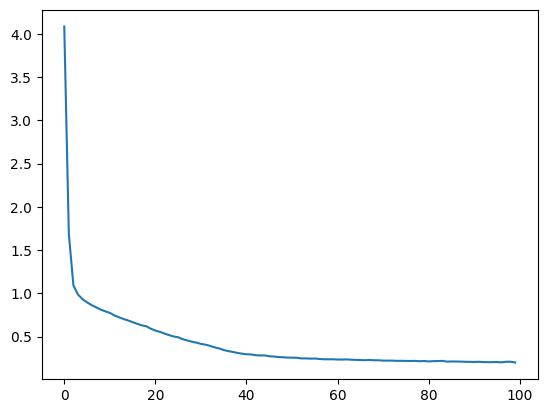

In [ ]:
optimizer = torch.optim.SGD(NN.parameters(), lr = 0.05)
epochs = 100
n = len(train_loader.dataset)
history = []

for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    zhat = NN(xx)
    qhat = torch.softmax(zhat, dim=1)
    loss = loss_fn(qhat, tt)
    loss.backward()
    epoch_loss += loss.item()*len(xx)
    optimizer.step()
    optimizer.zero_grad()
  history.append(epoch_loss/n)
  print("epoch = ", epoch, "current loss=", epoch_loss/n)

plt.plot(history)

In [ ]:
# z score
zhat = NN(X)
# q score
Q = torch.softmax(zhat, dim=1)
# q score 에서 axis 1방향에서 누가 큰지 index return
y_hat = torch.argmax(Q, axis=1).to(torch.float32) #y_hat: [n_test,]
#y = torch.argmax(t, axis=1).to(torch.float32)
#torch.mean((y_hat == y.reshape([-1])).to(torch.float32))
torch.mean((y_hat == y).to(torch.float32))

tensor(0.9267)

accuracy: 0.9267

## Multinomial logistic regression

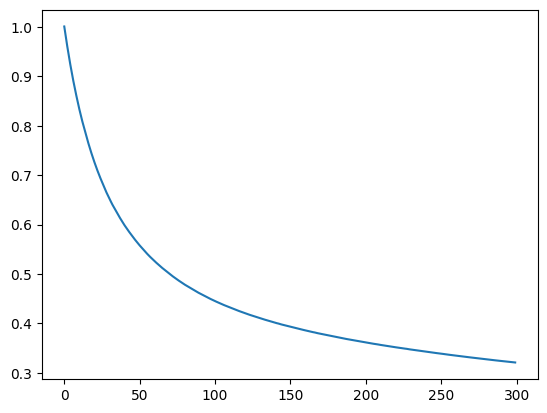

In [ ]:
z_model = torch.nn.Linear(4, 3, bias=True)

def loss_fn(qhat, t):
  loss = - torch.mean(torch.sum(t * torch.log(qhat), axis=1))
  return loss

optimizer = torch.optim.SGD(z_model.parameters(), lr=0.01)
history=[]
epochs = 300

for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    zhat = z_model(xx)
    qhat = torch.softmax(zhat, dim=1)
    loss = loss_fn(qhat, tt)
    loss.backward()
    epoch_loss += loss.item()*len(xx)
    optimizer.step()
    optimizer.zero_grad()
  history.append(epoch_loss/n)

plt.plot(history)

In [ ]:
def accuracy_fn(qhat, t):
  yhat = torch.argmax(qhat, axis=1).to(torch.float32)
  #print(yhat)
  y = torch.argmax(t, axis=1).to(torch.float32)
  #print(y)
  accuracy = torch.sum((y==yhat).to(torch.float32))
  #print(accuracy)
  return accuracy


accuracy_sum = 0

for X, T in test_loader:
  zhat = z_model(X)
  qhat = torch.softmax(zhat, dim=1)
  accuracy_sum += accuracy_fn(qhat,T).item()

print(accuracy_sum/len(X_val))

0.9666666666666667


# HW Problem 2: Fashion MNIST data

You are given the following fashion MNIST data. Use `the multinomial regression` and `neural networks` so that the model can determine the label from the images. Calculate the test accuracy. Compare your test accuracy with that of the `linear` version of the `multinomial regression`.

1. the picture

2. predicted label

3. real label

4. Explain the possible reason why your model is wrong in this case.

Hint: Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
test_loader = DataLoader(validationset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 15302344.10it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 221995.07it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4295916.30it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6513507.39it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
# Load MNIST data
import sklearn.datasets
mnist = sklearn.datasets.fetch_openml('mnist_784', data_home="mnist_784")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X = torch.tensor(mnist["data"].values, dtype=torch.float32).reshape([-1, 28* 28])
Y = torch.tensor(np.array(mnist["target"].values).astype(np.float32), dtype=torch.float32)
print(X.shape, Y.shape)

T = torch.nn.functional.one_hot(torch.tensor(Y, dtype=torch.int64), num_classes=10)
T = torch.tensor(T, dtype=torch.float32)

torch.Size([70000, 784]) torch.Size([70000])


<ipython-input-92-66260c33eac0>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T = torch.nn.functional.one_hot(torch.tensor(Y, dtype=torch.int64), num_classes=10)
<ipython-input-92-66260c33eac0>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T = torch.tensor(T, dtype=torch.float32)


In [ ]:
X[1]

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

In [ ]:
# 나누기 255: X 를 0과 1사이로 만들어주기 위함
x_train = torch.tensor(X[:60000, :]/255, dtype = torch.float32)
#y_train = torch.tensor(Y[:60000], dtype = torch.float32)
t_train = torch.tensor(T[:60000], dtype = torch.float32)
n=60000
x_test = torch.tensor(X[60000:, :]/255, dtype = torch.float32)
#y_test = torch.tensor(Y[60000:], dtype = torch.float32)
t_test = torch.tensor(T[60000:], dtype = torch.float32)

<ipython-input-94-ecab3ab8faaa>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(X[:60000, :]/255, dtype = torch.float32)
<ipython-input-94-ecab3ab8faaa>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_train = torch.tensor(T[:60000], dtype = torch.float32)
<ipython-input-94-ecab3ab8faaa>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(X[60000:, :]/255, dtype = torch.float32)
<ipython-input-94-ecab3ab8faaa>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTenso

In [ ]:
trainset = TensorDataset(x_train, t_train)
train_loader=DataLoader(dataset = trainset, batch_size=64, shuffle=True)
testset = TensorDataset(x_test, t_test)
test_loader=DataLoader(dataset = testset, batch_size=64, shuffle=True)

## Neural Networks

epoch =  0 current loss= 1.8584893751780192
epoch =  1 current loss= 0.6136448634783427
epoch =  2 current loss= 0.42038159116109214
epoch =  3 current loss= 0.3657022797425588
epoch =  4 current loss= 0.33451852757136025
epoch =  5 current loss= 0.3113001860221227
epoch =  6 current loss= 0.2921418906291326
epoch =  7 current loss= 0.27573780378500623
epoch =  8 current loss= 0.26059495448271436
epoch =  9 current loss= 0.247238405474027
epoch =  10 current loss= 0.23485332621733349
epoch =  11 current loss= 0.2232014863570531
epoch =  12 current loss= 0.21255197920401891
epoch =  13 current loss= 0.20284192453622818
epoch =  14 current loss= 0.19369319450060526
epoch =  15 current loss= 0.18512144252856572
epoch =  16 current loss= 0.17752708510955176
epoch =  17 current loss= 0.17039233059684436
epoch =  18 current loss= 0.16414286064108213
epoch =  19 current loss= 0.1578633177836736
epoch =  20 current loss= 0.15207744041482607
epoch =  21 current loss= 0.14707832266688348
epoch =

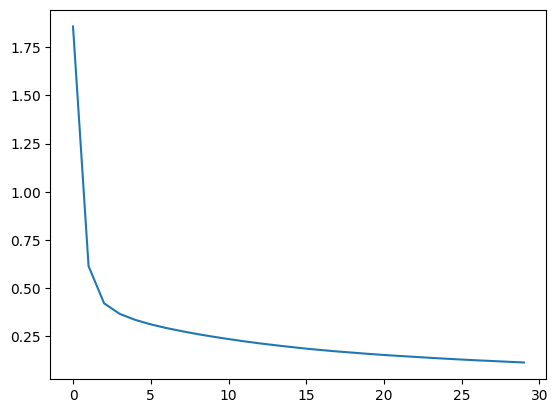

In [ ]:
SN = torch.nn.Sequential(
    torch.nn.Linear(784, 64, bias=True),
    torch.nn.ReLU(),#A[1]
    torch.nn.Linear(64, 32, bias=True),
    torch.nn.ReLU(),#A[2]
    torch.nn.Linear(32, 10, bias=True),
)

def loss_fn(qhat, t):
  temp = -torch.mean(torch.sum(t * torch.log(qhat), axis = 1))
  return temp

optimizer = torch.optim.SGD(SN.parameters(), lr=0.01)
history = []
epochs = 30
n=len(train_loader.dataset)

for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    #zhat = SN(xx.reshape([-1, 28* 28]))
    zhat = SN(xx)
    qhat = torch.softmax(zhat, dim = 1)
    loss = loss_fn(qhat, tt) #cross-entropy loss  = - log-lik(Multi(q, tt))
    loss.backward()
    epoch_loss += loss.item()*len(xx)
    optimizer.step()
    optimizer.zero_grad()
  history.append(epoch_loss/n)
  print("epoch = ", epoch, "current loss=", epoch_loss/n)

plt.plot(history)

epoch =  0 current loss= 1.8584893751780192
epoch =  1 current loss= 0.6136448634783427
epoch =  2 current loss= 0.42038159116109214
epoch =  3 current loss= 0.3657022797425588
epoch =  4 current loss= 0.33451852757136025
epoch =  5 current loss= 0.3113001860221227
epoch =  6 current loss= 0.2921418906291326
epoch =  7 current loss= 0.27573780378500623
epoch =  8 current loss= 0.26059495448271436
epoch =  9 current loss= 0.247238405474027
epoch =  10 current loss= 0.23485332621733349
epoch =  11 current loss= 0.2232014863570531
epoch =  12 current loss= 0.21255197920401891
epoch =  13 current loss= 0.20284192453622818
epoch =  14 current loss= 0.19369319450060526
epoch =  15 current loss= 0.18512144252856572
epoch =  16 current loss= 0.17752708510955176
epoch =  17 current loss= 0.17039233059684436
epoch =  18 current loss= 0.16414286064108213
epoch =  19 current loss= 0.1578633177836736
epoch =  20 current loss= 0.15207744041482607
epoch =  21 current loss= 0.14707832266688348
epoch =

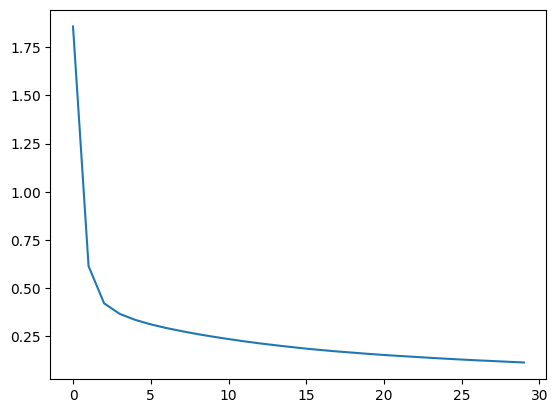

In [ ]:
SN = torch.nn.Sequential(
    torch.nn.Linear(784, 64, bias=True),
    torch.nn.ReLU(),#A[1]
    torch.nn.Linear(64, 32, bias=True),
    torch.nn.ReLU(),#A[2]
    torch.nn.Linear(32, 10, bias=True),
)

def loss_fn(qhat, t):
  temp = -torch.mean(torch.sum(t * torch.log(qhat), axis = 1))
  return temp

optimizer = torch.optim.SGD(SN.parameters(), lr=0.01)
history = []
epochs = 30
n=len(train_loader.dataset)

for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    zhat = SN(xx.reshape([-1, 28* 28]))
    qhat = torch.softmax(zhat, dim = 1)
    loss = loss_fn(qhat, tt)
    loss.backward()
    epoch_loss += loss.item()*len(xx)
    optimizer.step()
    optimizer.zero_grad()
  history.append(epoch_loss/n)
  print("epoch = ", epoch, "current loss=", epoch_loss/n)

plt.plot(history)

In [ ]:
# z score
zhat_test = SN(x_test) #x_test: [n_test, 784]
# q score
Q_test = torch.softmax(zhat_test, dim=1) # Q_test: [n_test, 10]
# q score 에서 axis 1방향에서 누가 큰지 index return
y_hat = torch.argmax(Q_test, axis=1).to(torch.float32) #y_hat: [n_test,]
y_test = torch.argmax(t_test, axis=1).to(torch.float32)
torch.mean((y_hat == y_test.reshape([-1])).to(torch.float32))

tensor(0.9628)

Sequential shallow neural network\
accuracy = 0.9628

## Multinomial logistic regression

In [ ]:
def loss_fn(qhat, t):
  temp = -torch.mean(torch.sum(t * torch.log(qhat), axis = 1))
  return temp

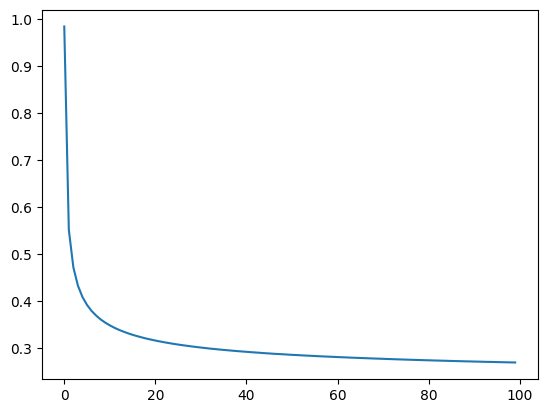

In [ ]:
z_model = torch.nn.Linear(784, 10, bias=True)

optimizer = torch.optim.SGD(z_model.parameters(), lr = 0.01)

# The Fashion-MNIST dataset contains 60,000 training images
# (and 10,000 test images)
n = 60000
epochs = 100
history = []

for epoch in range(epochs):
  epoch_loss = 0.0
  for xx, tt in train_loader:
    # reshape 필요?
    zhat = z_model(xx)
    qhat = torch.softmax(zhat, dim = 1)
    loss = loss_fn(qhat, tt)
    epoch_loss += loss.item()*len(xx)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  history.append(epoch_loss/n)

plt.plot(history)

In [ ]:
def accuracy_ftn(qhat, t):
  # yhat: 길이 n인 벡터
  yhat = torch.argmax(qhat, axis=1).to(torch.float32)
  # y: 길이 n인 벡터
  y = torch.argmax(t, axis=1).to(torch.float32)
  accuracy = torch.mean((y==yhat).to(torch.float32))
  return accuracy

accuracy_sum = 0
for X, T in test_loader:
  phat = torch.softmax(z_model(X), axis=1)
  temp = accuracy_ftn(phat, T)
  accuracy_sum += temp

accuracy = accuracy_sum/len(validationset)
print(accuracy)

tensor(0.0145)
